# Задания

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Доверительные интервалы

### Задание 1

Построй диаграмму зависимости количества проданной пиццы от дня недели.
Вывести дни недели, в которые продано **больше** и  **меньше** всего пиццы.

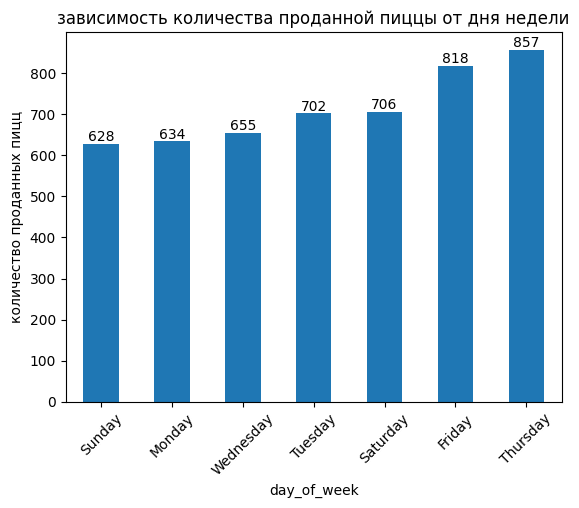

наибольшее количество проданных пицц в: Thursday
наименьшее количество проданных пицц в: Sunday


In [2]:
import pandas as pd

# загрузка данных из файла
data = pd.read_csv('../datasets/pizza.csv', sep=';', decimal=',')

# преобразование столбцов с датой и временем в типы datetime
data['order_date'] = pd.to_datetime(data['order_date'])
data['order_time'] = pd.to_datetime(data['order_time'], format='%H:%M:%S').dt.time

# создание нового столбца с днем недели
data['day_of_week'] = data['order_date'].dt.day_name()

# группировка данных по дню недели и подсчет количества проданных пицц
pizza_counts = data.groupby('day_of_week')['pizza_id'].count()

# сортировка дней недели по возрастанию количества проданных пицц
sorted_pizza_counts = pizza_counts.sort_values()

# построение гистограммы
ax = sorted_pizza_counts.plot(kind='bar')
plt.ylabel('количество проданных пицц')
plt.title('зависимость количества проданной пиццы от дня недели')

# настройка надписей под углом 45 градусов
plt.xticks(rotation=45)

# вывод количества над каждым столбиком
for i, v in enumerate(sorted_pizza_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

# нахождение дней недели с наибольшим и наименьшим количеством проданных пицц
max_pizza_day = sorted_pizza_counts.idxmax()
min_pizza_day = sorted_pizza_counts.idxmin()

print(f"наибольшее количество проданных пицц в: {max_pizza_day}")
print(f"наименьшее количество проданных пицц в: {min_pizza_day}")


### Задание 2

Посчитай, сколько **секунд** необходимо для приготовления каждой пиццы по всем заказам. Значения сохранить в новый столбец - `cook_time`. Найти среднее, медианное, максимальное и минимальное время приготовления пиццы. Результат округлите до целого.

In [3]:
# расчёт времени приготовления пиццы в секундах
data['cook_time'] = (pd.to_datetime(data['lead_time']) - pd.to_datetime(data['order_time'], format='%H:%M:%S')).dt.seconds

print(f"среднее время приготовления пиццы: {round(data['cook_time'].mean())} секунд")
print(f"медианное время приготовления пиццы: {round(data['cook_time'].median())} секунд")
print(f"максимальное время приготовления пиццы: {round(data['cook_time'].max())} секунд")
print(f"минимальное время приготовления пиццы: {round(data['cook_time'].min())} секунд")

среднее время приготовления пиццы: 1007 секунд
медианное время приготовления пиццы: 1006 секунд
максимальное время приготовления пиццы: 1609 секунд
минимальное время приготовления пиццы: 444 секунд


### Задание 3

Построй 95% доверительный интервал для среднего времени приготовления пиццы в **секундах**. Интервал округли до целого
> Для расчета стандартного отклонения используй `numpy.std(ddof=1)`

In [4]:
import scipy.stats as stats

# расчёт времени приготовления пиццы в секундах
data['cook_time'] = (pd.to_datetime(data['lead_time']) - pd.to_datetime(data['order_time'], format='%H:%M:%S')).dt.seconds

# расчёт стандартного отклонения и среднего времени приготовления пиццы
std_dev = np.std(data['cook_time'], ddof=1)
mean_cook_time = data['cook_time'].mean()

# расчёт доверительного интервала
confidence_interval = stats.t.interval(0.95, len(data['cook_time']) - 1, loc=mean_cook_time, scale=std_dev/np.sqrt(len(data['cook_time'])))

# округление интервала до целого
confidence_interval = [round(val) for val in confidence_interval]

print(f"95% доверительный интервал для среднего времени приготовления пиццы в секундах: {confidence_interval}")

95% доверительный интервал для среднего времени приготовления пиццы в секундах: [1002, 1012]


### Задание 4

Хозяин ресторана хочет оптимизировать меню ресторана. При формировании цены на пиццу хозяин хочет учитывать время 
её изготовления. Давай найдем ту пиццу (pizza_name), у которой верхняя граница доверительного интервала её изготовления 
самая высокая.
> Среди пицц, у которых за все время заказывали более 100 штук

In [5]:
# группировка данных по названию пиццы и подсчет количества заказов
pizza_counts = data['pizza_name'].value_counts()
popular_pizzas = pizza_counts[pizza_counts > 100].index

# фильтрация данных по популярным пиццам
pizza_popular = data[data['pizza_name'].isin(popular_pizzas)]

# расчёт статистик для каждой пиццы
pizza_stat = pizza_popular.groupby('pizza_name')['cook_time'].agg(['count', 'mean', 'std'])
pizza_stat['ci'] = pizza_stat['std'] / np.sqrt(pizza_stat['count'])
pizza_stat['high_border'] = pizza_stat['mean'] + pizza_stat['ci']

# нахождение пиццы с самой высокой верхней границей доверительного интервала
highest_border_pizza_name = pizza_stat['high_border'].idxmax()

highest_border_pizza_name

'The Italian Vegetables Pizza'

### Задание 5

Также хозяину ресторана хочется убрать из меню пиццы с нестабильным временем изготовления. 
Давай найдем пиццу с самым широким доверительным интервалом.
> Среди пицц, у которых за все время заказывали более 100 штук

In [6]:
# расчёт ширины доверительного интервала
pizza_stat['ci_width'] = 2 * pizza_stat['ci']

# нахождение пиццы с самым широким доверительным интервалом
wide_border_pizza_name = pizza_stat['ci_width'].idxmax()

wide_border_pizza_name

'The Chicken Alfredo Pizza'

## AB тестирование

### Задание 6

В качестве нулевой гипотезы (H0) выберем, что старый баннер лучше нового.  В качестве альтернативной гипотезы (H1) выберем, 
что новый баннер лучше старого. Построй 95% доверительный интервал для доли каждого из баннеров, используя метод 
[proportion_confint](https://www.statsmodels.org/devel/generated/statsmodels.stats.proportion.proportion_confint.html)
библиотеки statsmodels. Пересекаются ли эти интервалы?

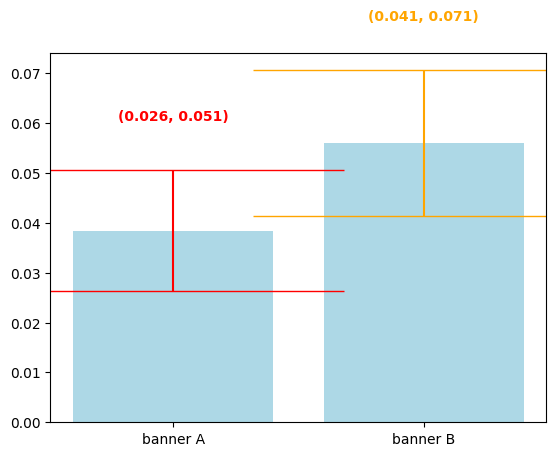

доверительный интервал для старого баннера: (0.026, 0.051)
доверительный интервал для нового баннера: (0.041, 0.071)
пересекаются ли интервалы? True


In [17]:
import statsmodels.stats.proportion as proportion

# загрузка данных из файла
data_click = pd.read_csv('../datasets/click.csv')

# расчёт количества кликов и показов для каждого баннера
clicks_old = data_click['banner_a'].sum()
clicks_new = data_click['banner_b'].sum()
shows_old = len(data_click) - clicks_old
shows_new = len(data_click) - clicks_new

# расчёт долей кликов для каждого баннера
prop_old = clicks_old / shows_old
prop_new = clicks_new / shows_new

# расчёт доверительных интервалов для долей
ci_old = proportion.proportion_confint(clicks_old, shows_old, alpha=0.05)
ci_new = proportion.proportion_confint(clicks_new, shows_new, alpha=0.05)

# создание полосатой гистограммы
plt.bar(['banner A', 'banner B'], [prop_old, prop_new], color='lightblue')

# добавление доверительных интервалов
plt.errorbar(['banner A'], [prop_old], yerr=[[prop_old - ci_old[0]], [ci_old[1] - prop_old]], fmt='none', ecolor='red', capsize=123)
plt.errorbar(['banner B'], [prop_new], yerr=[[prop_new - ci_new[0]], [ci_new[1] - prop_new]], fmt='none', ecolor='orange', capsize=123)

# добавление цифр для доверительных интервалов
plt.text('banner A', ci_old[1] + 0.01, f"({ci_old[0]:.3f}, {ci_old[1]:.3f})", ha='center', color='red', fontweight='heavy')
plt.text('banner B', ci_new[1] + 0.01, f"({ci_new[0]:.3f}, {ci_new[1]:.3f})", ha='center', color='orange', fontweight='heavy')
plt.show()

print(f"доверительный интервал для старого баннера: ({ci_old[0]:.3f}, {ci_old[1]:.3f})")
print(f"доверительный интервал для нового баннера: ({ci_new[0]:.3f}, {ci_new[1]:.3f})")
print(f"пересекаются ли интервалы? {(ci_old[0] <= ci_new[1]) and (ci_old[1] >= ci_new[0])}")

### Задание 7

Для более детальной оценки построй 95% доверительный интервал для разности двух долей.
**Ответ дай в формате:**\
95% доверительный интервал для разности двух долей: [0.99847, 9.99847]

Левая и правая границы доверительного интервала рассчитываются по формулам:
$$p_a - p_b \pm z * \sqrt{\frac{p_a(1 - p_a)}{n_a} + \frac{p_b(1 - p_b)}{n_b}}$$
Где

$p_a = \frac{n_{like(a)}}{n_{a}}$,

$p_b = \frac{n_{like(b)}}{n_{b}}$,

$z = 1-\frac{\alpha}{2}$ (используй scipy.stats.norm.ppf)

$n_a$ - общее количество кликов по баннеру а

$n_b$ - общее количество кликов по баннеру b

$n_{like(a)}$ - количество лайков по баннеру а

$n_{like(b)}$ - количество лайков по баннеру b

In [8]:
# расчёт значения p_a и p_b
n_a = n_b = len(data_click)
p_a = clicks_old / n_a
p_b = clicks_new / n_b

# вычисляем значение z
alpha = 0.05
z = stats.norm.ppf(1 - alpha/2)

# расчёт стандартной ошибки разности долей
se = np.sqrt((p_a * (1 - p_a) / n_a) + (p_b * (1 - p_b) / n_b))

# вычисляем левую и правую границы доверительного интервала
diff = p_a - p_b
ci_lower = diff - z * se
ci_upper = diff + z * se

print(f"95% доверительный интервал для разности двух долей: [{ci_lower:.5f}, {ci_upper:.5f}]")

95% доверительный интервал для разности двух долей: [-0.03416, 0.00216]


### Задание 8

Проведи АБ-тест. Какой баннер лучше? H0 - Старый баннер или H1 - новый баннер.
В этом тебе поможем функция [z-критерия](code-samples/stats.py).

$$Z({X_1, X_2}) =  \frac{p_a - p_b}{\sqrt{P(1 - P)(\frac{1}{n_a} + \frac{1}{n_b})}}$$
$$P = \frac{p_a{n_a} + p_b{n_b}}{{n_a} + {n_b}} $$

$p_a, p_b = \frac{∑кликов}{n}$, n - общее количество кликов по баннеру

$n_a$ - общее количество кликов по баннеру а

$n_b$ - общее количество кликов по баннеру b

In [9]:
def z_stat(sample1, sample2):
    n_a = len(sample1)
    n_b = len(sample2)

    p_a = float(sum(sample1)) / n_a
    p_b = float(sum(sample2)) / n_b 
    P = float(p_a * n_a + p_b * n_b) / (n_a + n_b)
  
    return (p_a - p_b) / np.sqrt(P * (1 - P) * (1. / n_a + 1. / n_b))

In [10]:
# расчёт количества кликов по старому баннеру и по новому баннеру
data_clicks_old = data_click['banner_a']
data_clicks_new = data_click['banner_b']

# проведение АБ-теста
#   расчет z-критерия
z = z_stat(data_clicks_old, data_clicks_new)
#   расчет p-значения
p = stats.norm.sf(abs(z))

print(p, '\n')
if p > 0.05:
    print("H0: старый баннер лучше нового баннера")
else:
    print("H1: новый баннер лучше старого баннера")

0.042189348005533284 

H1: новый баннер лучше старого баннера


## Корреляции

### Задание 9

Прочитай про корреляции Пирсона и Спирмена. Узнай какие связи между выборками они способны находить. По сгенерированным выборкам посчитай коррелицию Пирсона и Спирмена для выборок `x-y1`, `x-y2`, `x-y3`. Отрисуй выборки в формате, как показано ниже:
<img src="../misc/images/corr.png">

Объясни, почему получается такое значение корреляций.

In [11]:
x = np.linspace(-10,10,100)
y1 = x ** 2
y2 = -x **2
y3 = np.log(x ** 2 + 1)

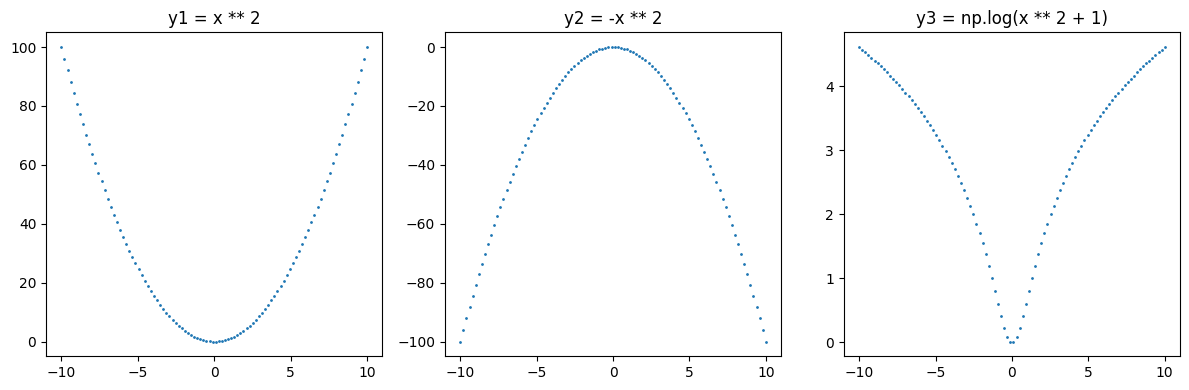

корреляция Пирсона:
y1-x: -3.469446951953614e-18
y2-x: 3.469446951953614e-18
y3-x: -2.949029909160572e-17

корреляция Спирмена:
y1-x: -0.002646479021386217
y2-x: 0.002646479021386217
y3-x: -0.0015483220600201772

Корреляция Пирсона измеряет линейную зависимость между переменными, а корреляция Спирмена измеряет монотонную зависимость.
В данном случае выборки y1, y2 и y3 не имеют ни линейной, ни монотонной зависимости от x, поэтому значения корреляций близки к нулю.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# расчёт корреляции Пирсона
corr_pearson_y1, _ = pearsonr(x, y1)
corr_pearson_y2, _ = pearsonr(x, y2)
corr_pearson_y3, _ = pearsonr(x, y3)

# расчёт корреляции Спирмена
corr_spearman_y1, _ = spearmanr(x, y1)
corr_spearman_y2, _ = spearmanr(x, y2)
corr_spearman_y3, _ = spearmanr(x, y3)

# графики
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(x, y1, s=1)
plt.title('y1 = x ** 2')

plt.subplot(1, 3, 2)
plt.scatter(x, y2, s=1)
plt.title('y2 = -x ** 2')

plt.subplot(1, 3, 3)
plt.scatter(x, y3, s=1)
plt.title('y3 = np.log(x ** 2 + 1)')

plt.tight_layout()
plt.show()

print('корреляция Пирсона:')
print('y1-x:', corr_pearson_y1)
print('y2-x:', corr_pearson_y2)
print('y3-x:', corr_pearson_y3)
print('\nкорреляция Спирмена:')
print('y1-x:', corr_spearman_y1)
print('y2-x:', corr_spearman_y2)
print('y3-x:', corr_spearman_y3)

print('\nКорреляция Пирсона измеряет линейную зависимость между переменными, а корреляция Спирмена измеряет монотонную зависимость.')
print('В данном случае выборки y1, y2 и y3 не имеют ни линейной, ни монотонной зависимости от x, поэтому значения корреляций близки к нулю.')

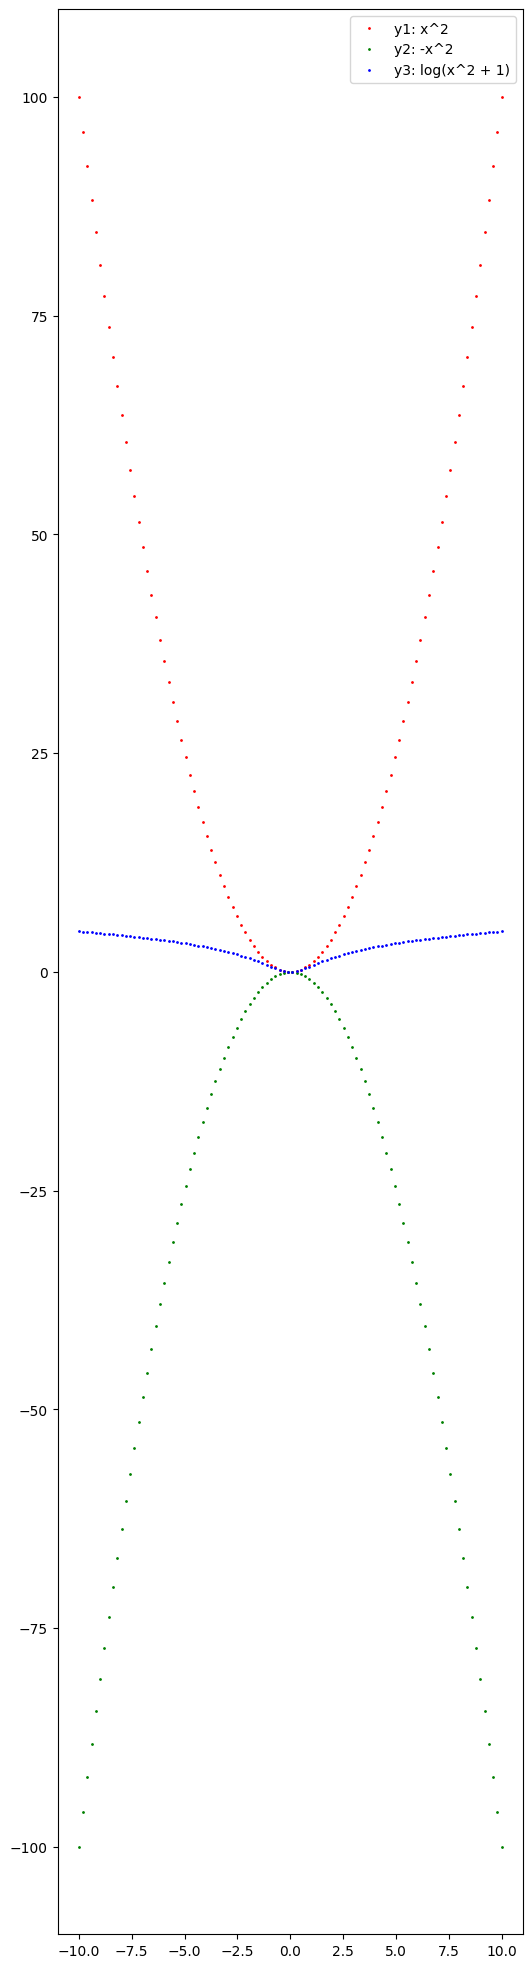

In [13]:
plt.figure(figsize=(6, 25))
plt.plot(x, y1, 'ro', markersize=1, label='y1: x^2')
plt.plot(x, y2, 'go', markersize=1, label='y2: -x^2')
plt.plot(x, y3, 'bo', markersize=1, label='y3: log(x^2 + 1)')
plt.legend()
plt.show()

### Задание 10

Построй облако из тысячи точек c помощью приведенного кода.
Выведи значения коэффициентов корреляции.
Случайным образом выбери четыре точки. Каждую из точек передвигать в правый верхний угол относительно облака точек 
(тем самым создавая выброс):
значения по оси х 25, 50, 150, 650
по оси y 20, 40, 60, 80.
Выводи на графике перемещения точек.
Для каждого расстояния рассчитай коэффициент корреляции Пирсона и Спирмана.
Какая корреляция больше устойчива к выбросам?

In [14]:
step = np.linspace(-10, 0, 1000)
x = -step + np.random.randn(1000) * 0.2
y = step + np.random.randn(1000)* 0.2

коэффициент корреляции Пирсона для облака точек: -0.9956823842037752
коэффициент корреляции Спирмена для облака точек: -0.995756015756016
коэффициент корреляции Пирсона для выбросов: 0.8716122139410247
коэффициент корреляции Спирмена для выбросов: 1.0

корреляция Спирмена более устойчива к выбросам


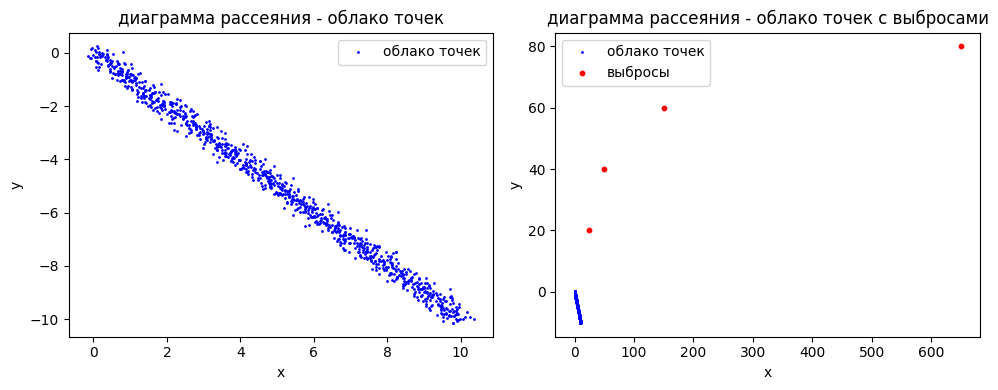

In [15]:
# вычисление коэффициентов корреляции для облака точек
corr_pearson_cloud, _ = pearsonr(x, y)
corr_spearman_cloud, _ = spearmanr(x, y)

# создание графика облака точек
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# график облака точек
ax1.scatter(x, y, color='blue', label='облако точек', s=1)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('диаграмма рассеяния - облако точек')
ax1.legend()

# добавление выбросов
x_outliers = [25, 50, 150, 650]
y_outliers = [20, 40, 60, 80]

# график с выбросами
ax2.scatter(x, y, color='blue', label='облако точек', s=1)
ax2.scatter(x_outliers, y_outliers, color='red', label='выбросы', s=10)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('диаграмма рассеяния - облако точек с выбросами')
ax2.legend()

# вычисление коэффициентов корреляции для выбросов
corr_pearson_outliers, _ = pearsonr(x_outliers, y_outliers)
corr_spearman_outliers, _ = spearmanr(x_outliers, y_outliers)

# вывод коэффициентов корреляции
print("коэффициент корреляции Пирсона для облака точек:", corr_pearson_cloud)
print("коэффициент корреляции Спирмена для облака точек:", corr_spearman_cloud)
print("коэффициент корреляции Пирсона для выбросов:", corr_pearson_outliers)
print("коэффициент корреляции Спирмена для выбросов:", corr_spearman_outliers)

# сравнение корреляций
if abs(corr_pearson_cloud) > abs(corr_spearman_cloud):
    print("\nкорреляция Пирсона более устойчива к выбросам")
else:
    print("\nкорреляция Спирмена более устойчива к выбросам")

# графики
plt.tight_layout()
plt.show()